In [1]:
import numpy as np
import helper_utils

In [2]:
helper_utils.list_available_tracks()

['reInvent2019_track', '2022_august_open', 'Canada_Training', 'canada_race', 'Tokyo_Training_track', 'Oval_track', 'thunder_hill_pro_cw', 'New_York_Track', 'Bowtie_track', 'H_track', 'reinvent_base', '2022_september_open', 'Mexico_track', 'Virtual_May19_Train_track', 'Straight_track', 'AWS_track', 'China_track', '2022_july_open', '2022_june_open', 'London_Loop_Train']


In [3]:
TRACK_NAME = 'thunder_hill_pro_cw'
center_line, inner_border, outer_border = helper_utils.load_track_waypoints(TRACK_NAME)

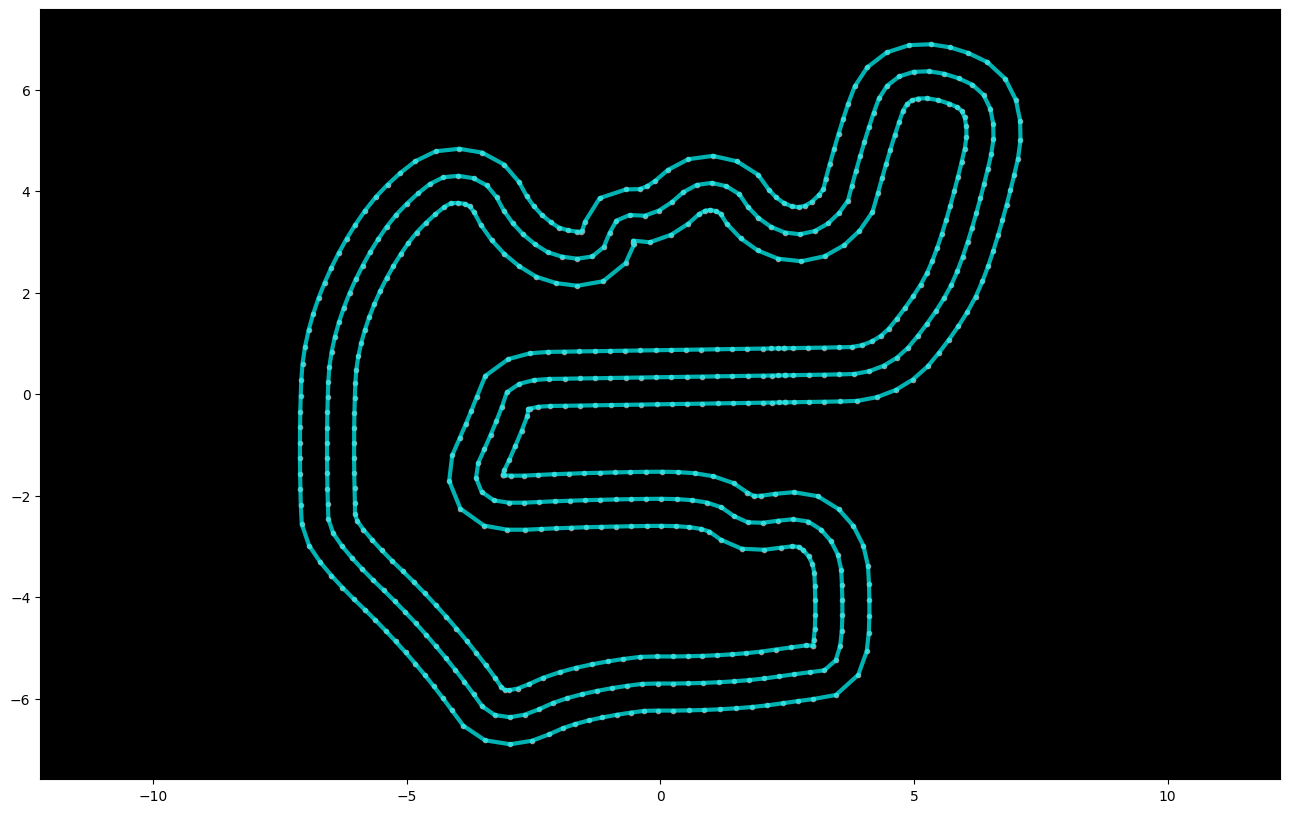

In [4]:
helper_utils.plot_track(center_line, inner_border, outer_border)

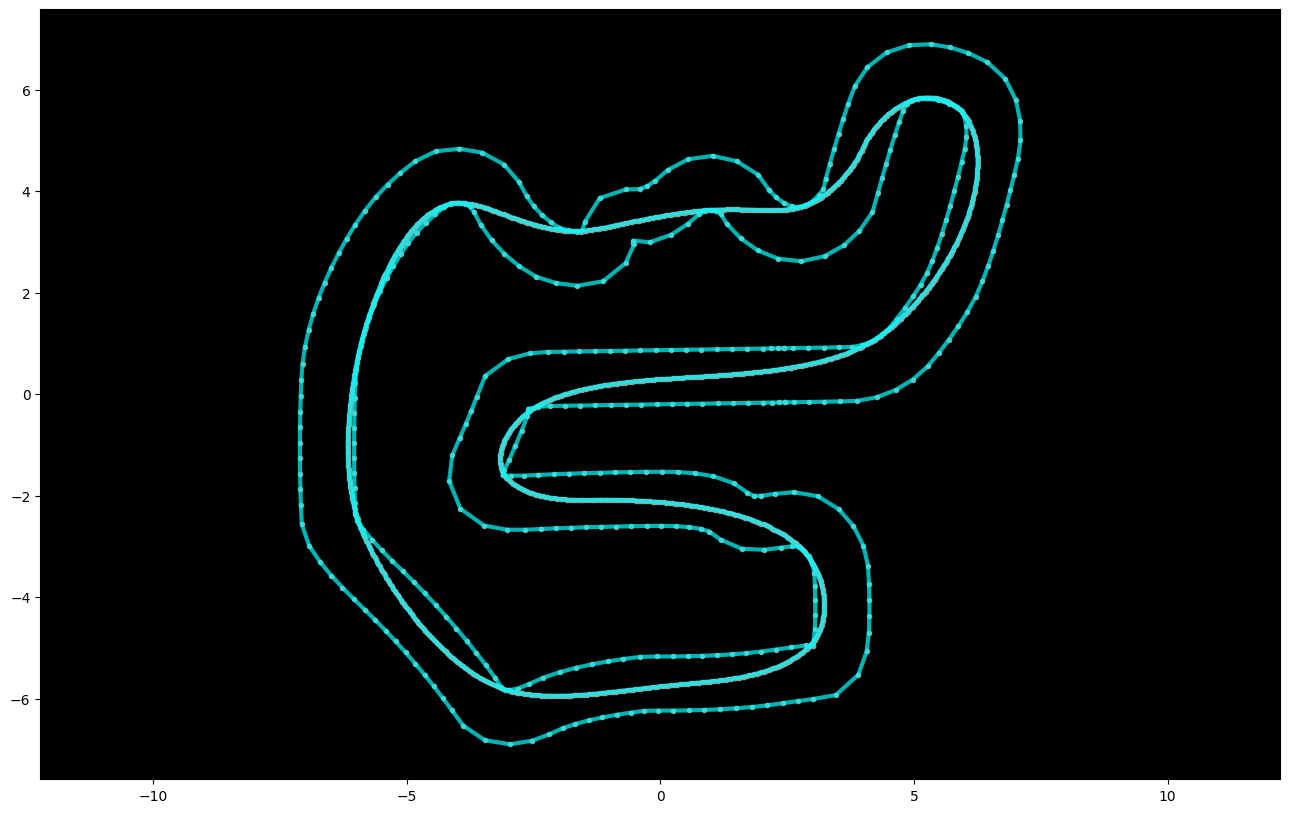

In [5]:
racing_line = helper_utils.load_py_to_ndarray('./racelines-populated/thunder_hill_pro_cw-cubspl-5.47-2023-06-19-172719.py')
helper_utils.plot_track(racing_line, inner_border, outer_border)

In [6]:
npoints = len(racing_line) - 1

In [7]:
# Input 3 coords [[x1,y1],[x2,y2],[x3,y3]]
def three_point_radius(coords):

    # Flatten the list and assign to variables
    x1, y1, x2, y2, x3, y3 = [i for sub in coords for i in sub]

    a = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    b = (x1**2+y1**2)*(y3-y2) + (x2**2+y2**2)*(y1-y3) + (x3**2+y3**2)*(y2-y1)
    c = (x1**2+y1**2)*(x2-x3) + (x2**2+y2**2)*(x3-x1) + (x3**2+y3**2)*(x1-x2)
    d = (x1**2+y1**2)*(x3*y2-x2*y3) + (x2**2+y2**2) * \
        (x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1-x1*y2)

    # Protect from DivideByZero exception (radius is infinity)
    if a != 0.0:
        r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5
    else:
        r = 999

    return r

In [8]:
track_curvatures = np.zeros(npoints)
for i in range(npoints):
    prv = (i - 1) % npoints
    nxt = (i + 1) % npoints
    points = [[racing_line[prv, 0], racing_line[prv, 1]], [racing_line[i, 0], racing_line[i, 1]], [racing_line[nxt, 0], racing_line[nxt, 1]]]
    track_curvatures[i] = three_point_radius(points)
track_curvatures

array([9.15710513, 9.05656711, 9.15807738, ..., 7.88671366, 8.35216613,
       8.60895109])

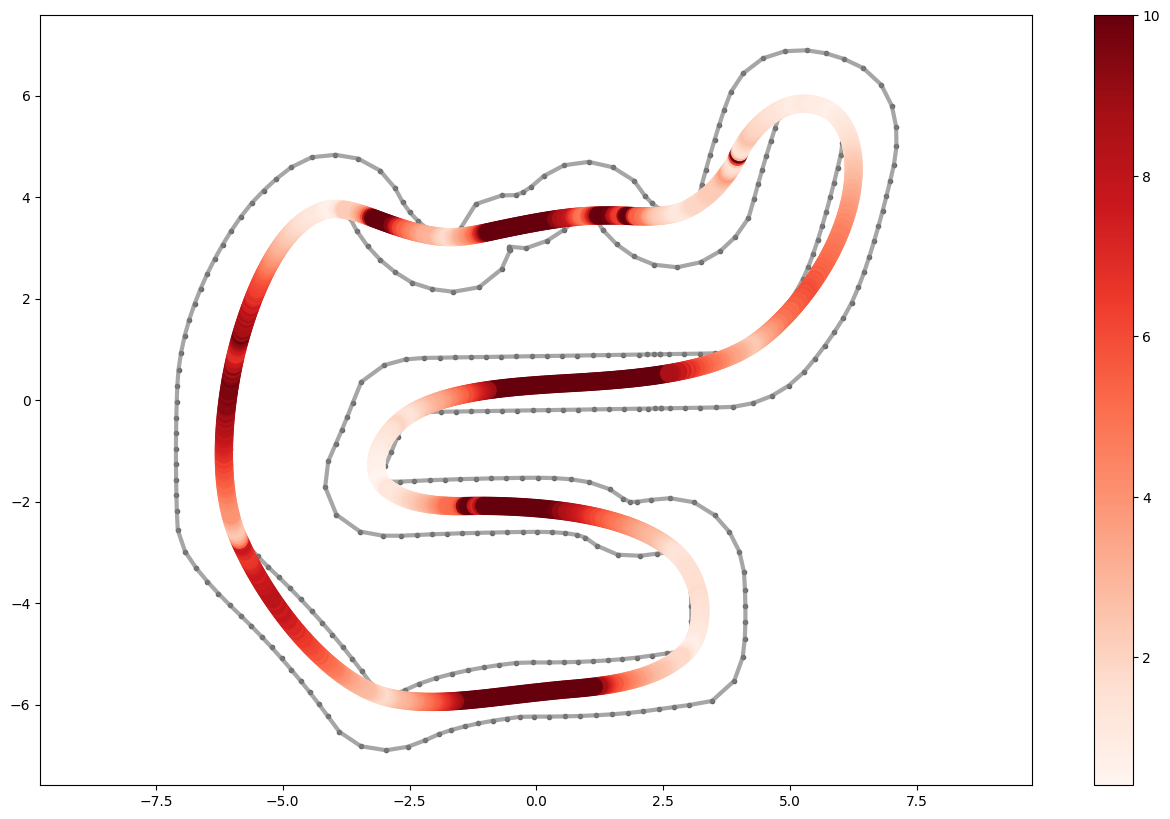

In [9]:
MAX_CURVATURE = 10

fig = helper_utils.plot_border(inner_border, outer_border)
scatter = fig.gca().scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=np.minimum(track_curvatures, MAX_CURVATURE), cmap='Reds', zorder=3
)
fig.colorbar(scatter)

In [10]:
def is_right_turn(points: list) -> bool:
    prv_x = points[1][0] - points[0][0]
    prv_y = points[1][1] - points[0][1]
    nxt_x = points[2][0] - points[1][0]
    nxt_y = points[2][1] - points[1][1]

    #rotate nxt counterclockwise
    nxt_x, nxt_y = -nxt_y, nxt_x

    dot = prv_x * nxt_x + prv_y * nxt_y
    return dot > 0

In [11]:
track_directions = np.zeros(npoints)
for i in range(npoints):
    prv = (i - 1) % npoints
    nxt = (i + 1) % npoints
    points = [[racing_line[prv, 0], racing_line[prv, 1]], [racing_line[i, 0], racing_line[i, 1]], [racing_line[nxt, 0], racing_line[nxt, 1]]]
    track_directions[i] = -1 if is_right_turn(points) else 1
track_directions

array([-1., -1., -1., ..., -1., -1., -1.])

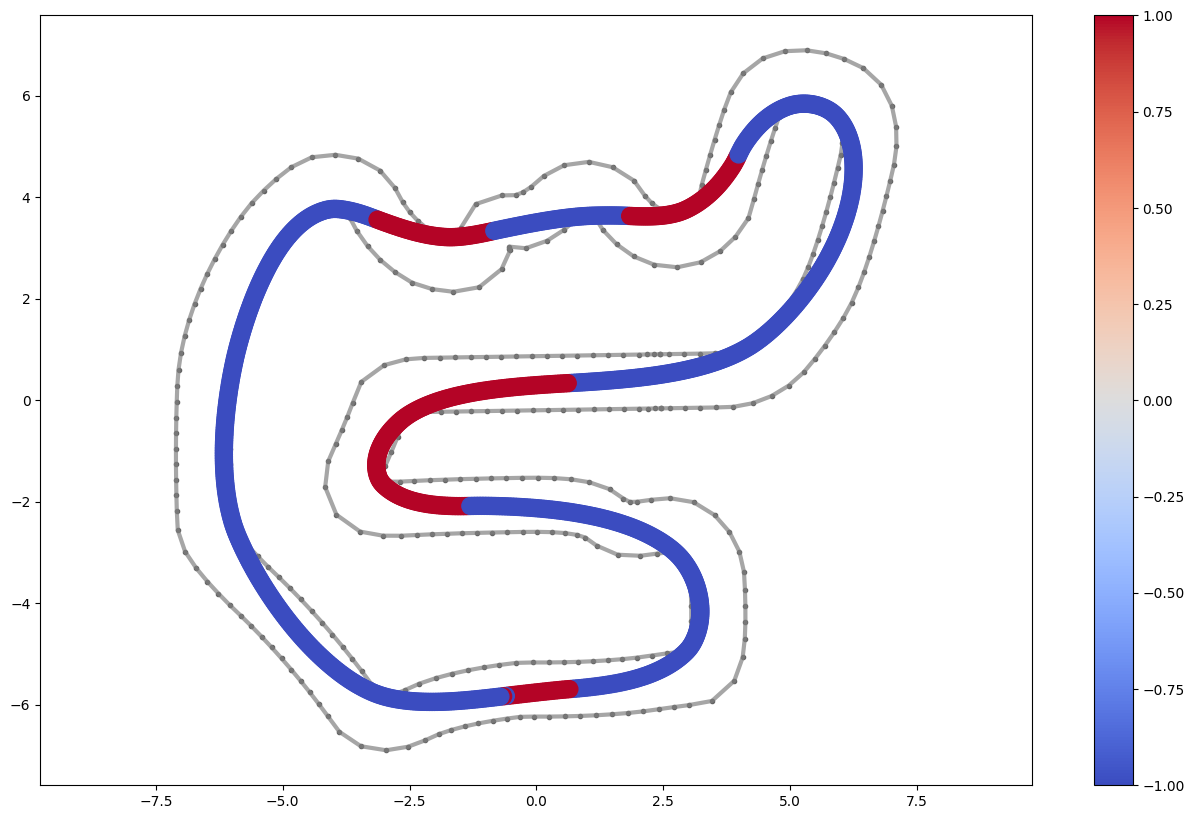

In [12]:
fig = helper_utils.plot_border(inner_border, outer_border)
scatter = fig.gca().scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=track_directions, cmap='coolwarm', zorder=3
)
fig.colorbar(scatter)

In [13]:
track_curvatures = np.minimum(track_curvatures, MAX_CURVATURE)
signed_track_curvatures = track_curvatures * track_directions

In [14]:
from datetime import datetime

now = datetime.now()
prefix = './track-curvatures/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
arr_repr = helper_utils.array1D_repr_columns(signed_track_curvatures, 14)
helper_utils.export_ndarray(signed_track_curvatures, prefix, arr_repr)

Writing python code to ./track-curvatures/thunder_hill_pro_cw-2023-06-19-173038.py
Writing numpy binary to ./track-curvatures/thunder_hill_pro_cw-2023-06-19-173038.npy
